<a href="https://colab.research.google.com/github/mssamoilenko/Data_enginWindow/blob/main/Data_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Згенеруйте дані на основі ковзаючих вікон(цільовий стовпчик `totals_transactionRevenue`)

In [42]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/refs/heads/main/module3/data/data.csv",
                 index_col=0)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 57 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   channelGrouping                                    100000 non-null  object 
 1   date                                               100000 non-null  int64  
 2   fullVisitorId                                      100000 non-null  uint64 
 3   socialEngagementType                               100000 non-null  object 
 4   visitId                                            100000 non-null  int64  
 5   visitNumber                                        100000 non-null  int64  
 6   visitStartTime                                     100000 non-null  int64  
 7   device_browser                                     100000 non-null  object 
 8   device_browserVersion                              100000 non-null  object 
 9  

In [44]:
df.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserVersion,device_browserSize,...,trafficSource_keyword,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_adContent,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.isVideoAd
0,Organic Search,20171016,5882839380479893026,Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,...,water bottle,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Referral,20171016,169064020318706586,Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,not available in demo dataset,/a/google.com/transportation/mtv-services/bike...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Direct,20171016,6157754009880713732,Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,...,NaN,not available in demo dataset,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20171016,7805861212153847553,Not Socially Engaged,1508169851,1,1508169851,Chrome,not available in demo dataset,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20171016,5130680452619315824,Not Socially Engaged,1508190552,1,1508190552,Chrome,not available in demo dataset,not available in demo dataset,...,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Завдання 1

Перетворіть стовпчик `date` у тип дати та виведіть гістограму. На її основі виберіть розміри вікон та пропуск

In [45]:
df['date'] = pd.to_datetime(df['date'].astype('str'))
df['date']

,date
0,2017-10-16
1,2017-10-16
2,2017-10-16
3,2017-10-16
4,2017-10-16
...,...
99995,2017-05-29
99996,2017-05-29
99997,2017-05-29
99998,2017-05-29


In [46]:
df.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,device_isMobile,totals_visits,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_sessionQualityDim,totals_timeOnSite,totals_transactions,totals_transactionRevenue,totals_totalTransactionRevenue,trafficSource_adwordsClickInfo.page
count,100000,1.000000e+05,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.0,100000.000000,100000.000000,49854.0,76365.0,46128.000000,50026.000000,1002.000000,1.000000e+05,9.970000e+02,4391.000000
mean,2017-06-30 11:04:38.784000256,4.400340e+18,1.498890e+09,2.333650,1.498890e+09,0.310740,1.0,4.367070,3.647260,1.0,1.0,3.567681,241.951085,1.055888,1.187122e+06,1.368457e+08,1.020041
min,2016-08-11 00:00:00,4.681782e+15,1.470896e+09,1.000000,1.470899e+09,0.000000,1.0,1.000000,0.000000,1.0,1.0,1.000000,1.000000,1.000000,0.000000e+00,3.400000e+06,1.000000
25%,2016-12-13 00:00:00,1.493431e+18,1.481673e+09,1.000000,1.481673e+09,0.000000,1.0,1.000000,1.000000,1.0,1.0,1.000000,29.000000,1.000000,0.000000e+00,2.799000e+07,1.000000
50%,2017-06-24 00:00:00,4.198660e+18,1.498295e+09,1.000000,1.498295e+09,0.000000,1.0,2.000000,1.000000,1.0,1.0,1.000000,76.000000,1.000000,0.000000e+00,5.357000e+07,1.000000
75%,2017-11-30 00:00:00,7.018859e+18,1.512092e+09,1.000000,1.512092e+09,1.000000,1.0,4.000000,4.000000,1.0,1.0,1.000000,231.000000,1.000000,0.000000e+00,1.146500e+08,1.000000
max,2018-04-29 00:00:00,9.977822e+18,1.525072e+09,401.000000,1.525072e+09,1.000000,1.0,331.000000,230.000000,1.0,1.0,96.000000,9837.000000,8.000000,5.498000e+09,5.501000e+09,6.000000
std,NaN,3.052416e+18,1.625577e+07,8.991106,1.625577e+07,0.462799,0.0,8.596425,6.147004,0.0,0.0,10.782624,456.107335,0.353193,2.841594e+07,3.024466e+08,0.212500


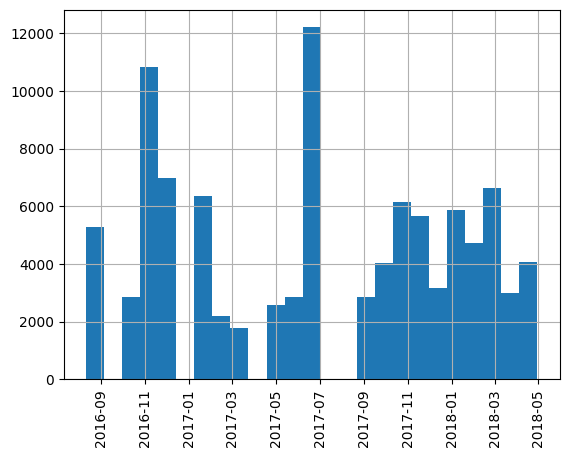

In [47]:
df['date'].hist(bins=25)
plt.xticks(rotation=90)
plt.show()

# Завдання 2

Отримайте дані з відповідних вікон

Формули для вікон по нумерації k=1,2,3,...

```bash
lower = df['date'].min() + (k-1)*window_X
upper = df['date'].min() + k*window_X
mask = (lower < df['date']) & (df['date'] < upper)
X = df[mask]
```

```bash
lower = df['date'].min() + k*window_X + gap
upper = df['date'].min() + k*window_X + gap + window_y
mask = (lower < df['date']) & (df['date'] < upper)
y = df[mask]
```

In [48]:
window_X = pd.Timedelta('90D')
gap = pd.Timedelta('30D')
window_y = pd.Timedelta('60D')

In [49]:
def get_window_data(k, df, window_X, window_y, gap):
    lower_X = df['date'].min() + (k-1) * window_X
    upper_X = df['date'].min() + k * window_X
    X = df[(df['date'] > lower_X) & (df['date'] < upper_X)]

    lower_y = upper_X + gap
    upper_y = lower_y + window_y
    y = df[(df['date'] > lower_y) & (df['date'] < upper_y)]

    return X, y

# Завдання 3

Створіть словник де ключ -- назва стовпчика, а значення -- список функцій:
* для числових - sum, mean, min, max
* для категоріальних - mode

Згрупуйте дані по користувачах(лише Х) та обрахуйте відповідні функції

In [50]:
num_colum = df.select_dtypes(include=['number']).columns
cat_colum = df.select_dtypes(include=['object', 'category']).columns

In [51]:
def get_mode(column):
    mode = column.mode()
    return mode[0] if len(mode) > 0 else 'None'

params = {}
for col in num_colum:
    params[col] = ['sum', 'mean', 'min', 'max']
for col in cat_colum:
    params[col] = [get_mode]
params

{'fullVisitorId': ['sum', 'mean', 'min', 'max'],
 'visitId': ['sum', 'mean', 'min', 'max'],
 'visitNumber': ['sum', 'mean', 'min', 'max'],
 'visitStartTime': ['sum', 'mean', 'min', 'max'],
 'device_isMobile': ['sum', 'mean', 'min', 'max'],
 'totals_visits': ['sum', 'mean', 'min', 'max'],
 'totals_hits': ['sum', 'mean', 'min', 'max'],
 'totals_pageviews': ['sum', 'mean', 'min', 'max'],
 'totals_bounces': ['sum', 'mean', 'min', 'max'],
 'totals_newVisits': ['sum', 'mean', 'min', 'max'],
 'totals_sessionQualityDim': ['sum', 'mean', 'min', 'max'],
 'totals_timeOnSite': ['sum', 'mean', 'min', 'max'],
 'totals_transactions': ['sum', 'mean', 'min', 'max'],
 'totals_transactionRevenue': ['sum', 'mean', 'min', 'max'],
 'totals_totalTransactionRevenue': ['sum', 'mean', 'min', 'max'],
 'trafficSource_adwordsClickInfo.page': ['sum', 'mean', 'min', 'max'],
 'channelGrouping': [<function __main__.get_mode(column)>],
 'socialEngagementType': [<function __main__.get_mode(column)>],
 'device_browser': 

In [52]:
X, y = get_window_data(k=1, df=df, window_X=pd.Timedelta('90D'), window_y=pd.Timedelta('60D'), gap=pd.Timedelta('30D'))

# Завдання 4

Для даних з пізнішого вікна(у) обрахуйте суму `totals_transactionRevenue` для кожного користувача

In [53]:
y_grouped = y.groupby('fullVisitorId')['totals_transactionRevenue'].sum().reset_index()
y_grouped

,fullVisitorId,totals_transactionRevenue
0,4681782413258180,24990000
1,4716754086642834,0
2,21234147381275782,0
3,24221961786219821,0
4,34208980776585217,0
...,...,...
989,9947026042460614024,0
990,9958282727161780218,0
991,9959375007479901087,0
992,9972297848679017937,0


# Завдання 5

Об'єднайте дані по id користувачів, якщо з'являються NaN, то замініть нулем(користувач не користувався системою)

In [57]:
X_grouped = X.groupby('fullVisitorId').agg(params).fillna(0)
X_grouped.columns = ['_'.join(col) for col in X_grouped.columns]
X_grouped = X_grouped.reset_index()
X_grouped

,fullVisitorId,fullVisitorId_sum,fullVisitorId_mean,fullVisitorId_min,fullVisitorId_max,visitId_sum,visitId_mean,visitId_min,visitId_max,visitNumber_sum,...,trafficSource_medium_get_mode,trafficSource_keyword_get_mode,trafficSource_adwordsClickInfo.criteriaParameters_get_mode,trafficSource_referralPath_get_mode,trafficSource_isTrueDirect_get_mode,trafficSource_adContent_get_mode,trafficSource_adwordsClickInfo.slot_get_mode,trafficSource_adwordsClickInfo.gclId_get_mode,trafficSource_adwordsClickInfo.adNetworkType_get_mode,trafficSource_adwordsClickInfo.isVideoAd_get_mode
0,4681782413258180,18727129653032720,4.681782e+15,4681782413258180,4681782413258180,5902258812,1.475565e+09,1472823779,1476509950,4,...,(none),None,not available in demo dataset,/yt/about/,True,None,None,None,None,None
1,4716754086642834,47167540866428340,4.716754e+15,4716754086642834,4716754086642834,14742894354,1.474289e+09,1472804165,1476497436,25,...,(none),(not provided),not available in demo dataset,/yt/about/,True,None,Top,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRMY-4jVpxN...,Google Search,False
2,21234147381275782,84936589525103128,2.123415e+16,21234147381275782,21234147381275782,5895007011,1.473752e+09,1472842410,1476468054,5,...,(none),(not provided),not available in demo dataset,/,None,None,None,None,None,None
3,24221961786219821,169553732503538747,2.422196e+16,24221961786219821,24221961786219821,10320863710,1.474409e+09,1472811969,1476512568,9,...,(none),(not provided),not available in demo dataset,/,True,None,None,None,None,None
4,34208980776585217,205253884659511302,3.420898e+16,34208980776585217,34208980776585217,8840609142,1.473435e+09,1472800408,1476500825,15,...,referral,(not provided),not available in demo dataset,/optimize/home/,True,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,9947026042460614024,12841642064883966888,9.947026e+18,9947026042460614024,9947026042460614024,7378673191,1.475735e+09,1472852579,1476473176,7,...,referral,None,not available in demo dataset,/yt/about/fr/,True,None,None,None,None,None
987,9958282727161780218,12897925488389797858,9.958283e+18,9958282727161780218,9958282727161780218,7371391405,1.474278e+09,1472804709,1476486618,7,...,(none),(not provided),not available in demo dataset,/yt/about/en-GB/,True,None,None,None,None,None
988,9959375007479901087,1472005941250250558,9.959375e+18,9959375007479901087,9959375007479901087,2949303542,1.474652e+09,1472836445,1476467097,3,...,referral,None,not available in demo dataset,/yt/about/,True,None,None,None,None,None
989,9972297848679017937,12968001095975986453,9.972298e+18,9972297848679017937,9972297848679017937,7378771045,1.475754e+09,1472837752,1476491688,6,...,affiliate,None,not available in demo dataset,/yt/about/ar/,True,None,None,None,None,None


# Завдання 6

Напишіть функцію `select_info(k)` яка містить код із завдань 2-5 та згенеровані дані для конкретного вікна

In [58]:
def select_info(k, df, window_X, window_y, gap):
    X, y = get_window_data(k, df, window_X, window_y, gap)

    X_grouped = X.groupby('fullVisitorId').agg(params)
    X_grouped.columns = ['_'.join(col) for col in X_grouped.columns]
    X_grouped = X_grouped.reset_index()

    y_grouped = y.groupby('fullVisitorId')['totals_transactionRevenue'].sum().reset_index()

    merged_data = pd.merge(X_grouped, y_grouped, on='fullVisitorId', how='left').fillna(0)

    merged_data['window'] = k

    return merged_data

# Завдання 7

Якщо все зроблено правильно, наступний код має повернути таблицю по всіх вікнах

In [59]:
full_data = pd.DataFrame()
num = 10 # кількість вікон, можете змінити

for k in range(1, num+1):
    data = select_info(k, df, window_X, window_y, gap)
    full_data = pd.concat([full_data, data], axis=0)

full_data

,fullVisitorId,fullVisitorId_sum,fullVisitorId_mean,fullVisitorId_min,fullVisitorId_max,visitId_sum,visitId_mean,visitId_min,visitId_max,visitNumber_sum,...,trafficSource_adwordsClickInfo.criteriaParameters_get_mode,trafficSource_referralPath_get_mode,trafficSource_isTrueDirect_get_mode,trafficSource_adContent_get_mode,trafficSource_adwordsClickInfo.slot_get_mode,trafficSource_adwordsClickInfo.gclId_get_mode,trafficSource_adwordsClickInfo.adNetworkType_get_mode,trafficSource_adwordsClickInfo.isVideoAd_get_mode,totals_transactionRevenue,window
0,4681782413258180,18727129653032720,4.681782e+15,4681782413258180,4681782413258180,5902258812,1.475565e+09,1472823779,1476509950,4,...,not available in demo dataset,/yt/about/,True,None,None,None,None,None,24990000.0,1
1,4716754086642834,47167540866428340,4.716754e+15,4716754086642834,4716754086642834,14742894354,1.474289e+09,1472804165,1476497436,25,...,not available in demo dataset,/yt/about/,True,None,Top,Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRMY-4jVpxN...,Google Search,False,0.0,1
2,21234147381275782,84936589525103128,2.123415e+16,21234147381275782,21234147381275782,5895007011,1.473752e+09,1472842410,1476468054,5,...,not available in demo dataset,/,None,None,None,None,None,None,0.0,1
3,24221961786219821,169553732503538747,2.422196e+16,24221961786219821,24221961786219821,10320863710,1.474409e+09,1472811969,1476512568,9,...,not available in demo dataset,/,True,None,None,None,None,None,0.0,1
4,34208980776585217,205253884659511302,3.420898e+16,34208980776585217,34208980776585217,8840609142,1.473435e+09,1472800408,1476500825,15,...,not available in demo dataset,/optimize/home/,True,None,None,None,None,None,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,9947026042460614024,4526054069656150296,9.947026e+18,9947026042460614024,9947026042460614024,28893959992,1.520735e+09,1518378858,1524994332,44,...,not available in demo dataset,/,True,None,None,None,None,None,0.0,7
990,9958282727161780218,1800288317750290342,9.958283e+18,9958282727161780218,9958282727161780218,22823189219,1.521546e+09,1519204897,1525023527,18,...,not available in demo dataset,/watch,True,None,None,None,None,None,0.0,7
991,9959375007479901087,344666581271852819,9.959375e+18,9959375007479901087,9959375007479901087,19788025276,1.522156e+09,1519243417,1525035014,25,...,not available in demo dataset,/,True,Ad from 12/15/17,None,None,None,None,0.0,7
992,9972297848679017937,11982812989187874064,9.972298e+18,9972297848679017937,9972297848679017937,24325920130,1.520370e+09,1518378663,1523808345,26,...,not available in demo dataset,/,True,Placement Accessores 300 x 250,None,None,None,None,0.0,7
